# Data preprocessing

In [48]:
import warnings
warnings.filterwarnings("ignore")
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full_dataset = pd.read_csv('full_dataset.csv',sep=",")

we will try to explain :

Health outcomes related to PM2.5 between 2015 to 2017 :
- Asthma Emergency Department Visits
- Asthma Hospitalizations
- Deaths

Health outcomes related to O3 between 2015 to 2017
- Asthma Emergency Department Visits
- Respiratory and Cardiovascular Hospitalizations
- Deaths

As well as the concentration of those two particles, to understand which are the factors that impacts them.

we will concentrate on 2015-2017 data, since those are the years for which we have the most complete data.

In [3]:
columns = full_dataset.columns
for column in columns:
    print(column)

UHF42
Largest Property Use Type - Gross Floor Area (ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Total GHG Emissions (Metric Tons CO2e)
number of restaurants
parks superficy
poverty percentage
traffic volume
Borough
NO2 | Annual Average 2009
NO2 | Annual Average 2010
NO2 | Annual Average 2011
NO2 | Annual Average 2012
NO2 | Annual Average 2013
NO2 | Annual Average 2014
NO2 | Annual Average 2015
NO2 | Annual Average 2016
NO2 | Annual Average 2017
NO2 | Annual Average 2018
NO2 | Annual Average 2019
NO2 | Annual Average 2020
NO2 | Annual Average 2021
NO2 | Summer 2009
NO2 | Summer 2010
NO2 | Summer 2011
NO2 | Summer 2012
NO2 | Summer 2013
NO2 | Summer 2014
NO2 | Summer 2015
NO2 | Summer 2016
NO2 | Summer 2017
NO2 | Summer 2018
NO2 | Summer 2019
NO2 | Summer 2020
NO2 | Summer 2021
NO2 | Winter 2008-09
NO2 | Winter 2009-10
NO2 | Winter 2010-11
NO2 | Winter 2011-12
NO2 | Winter 2012-13
NO2 | Winter 201

In [4]:
selected_columns = [
    'UHF42',
    'Largest Property Use Type - Gross Floor Area (ft²)',
    'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
    'Natural Gas Use (kBtu)',
    'Weather Normalized Site Natural Gas Use (therms)',
    'Total GHG Emissions (Metric Tons CO2e)',
    'number of restaurants',
    'parks superficy',
    'poverty percentage',
    'traffic volume',
    'Borough',
    'PM2.5 | Annual Average 2009',
    'PM2.5 | Annual Average 2010',
    'PM2.5 | Annual Average 2011',
    'PM2.5 | Annual Average 2012',
    'PM2.5 | Annual Average 2013',
    'PM2.5 | Annual Average 2014',
    'PM2.5 | Annual Average 2015',
    'PM2.5 | Annual Average 2016',
    'PM2.5 | Annual Average 2017',
    'O3 | Summer 2009',
    'O3 | Summer 2010',
    'O3 | Summer 2011',
    'O3 | Summer 2012',
    'O3 | Summer 2013',
    'O3 | Summer 2014',
    'O3 | Summer 2015',
    'O3 | Summer 2016',
    'O3 | Summer 2017',
    'PM2.5_AEDV | Estimated annual rate (under age 18) | 2015-2017',
    'PM2.5_AEDV | Estimated annual rate (age 18+) | 2015-2017',
    'PM2.5_CH | 2015-2017',
    'PM2.5_RH | 2015-2017',
    'PM2.5_D | 2015-2017',
    'O3_AEDV | Estimated annual rate (under age 18) | 2015-2017',
    'O3_AEDV | Estimated annual rate (age 18+) | 2015-2017',
    'O3_AH | Estimated annual rate (age 18+) | 2015-2017',
    'O3_AH | Estimated annual rate (under age 18) | 2015-2017',
    'O3_CRD | 2015-2017'
]

selected_df = full_dataset[selected_columns]

In [5]:
selected_df['O3 Particles Concentration'] = ( selected_df['O3 | Summer 2017'] + selected_df['O3 | Summer 2016'] + selected_df['O3 | Summer 2015'] ) / 3

In [6]:
selected_df['O3 Asthma Emergency Department Visits'] = ( selected_df['O3_AEDV | Estimated annual rate (under age 18) | 2015-2017'] + 
selected_df['O3_AEDV | Estimated annual rate (age 18+) | 2015-2017'] ) / 2

In [7]:
selected_df['O3 Attributable Hospitalizations'] = ( selected_df['O3_AH | Estimated annual rate (age 18+) | 2015-2017'] + selected_df['O3_AH | Estimated annual rate (under age 18) | 2015-2017'] ) / 2

In [8]:
selected_df['PM2.5 Particles Concentration'] = ( selected_df['PM2.5 | Annual Average 2015'] + selected_df['PM2.5 | Annual Average 2016'] + selected_df['PM2.5 | Annual Average 2017'] ) / 3

In [9]:
selected_df['PM2.5 Asthma Emergency Department Visits'] = (selected_df['PM2.5_AEDV | Estimated annual rate (under age 18) | 2015-2017'] + selected_df['PM2.5_AEDV | Estimated annual rate (age 18+) | 2015-2017']) / 2

In [10]:
selected_df['PM2.5 Attributable Hospitalizations'] = ( selected_df['PM2.5_CH | 2015-2017']+ selected_df['PM2.5_RH | 2015-2017'] ) / 2

In [11]:
columns_rename= {
 'PM2.5_D | 2015-2017': "PM2.5 Attributable Deaths",
  'O3_CRD | 2015-2017': "O3 Attributable Deaths"
}
selected_df.rename(columns=columns_rename, inplace=True)

In [12]:
selected_df.drop(columns=['O3 | Summer 2017', 
                          'O3 | Summer 2016',
                          'O3 | Summer 2015', 
                          'O3_AEDV | Estimated annual rate (under age 18) | 2015-2017',
                          'O3_AEDV | Estimated annual rate (age 18+) | 2015-2017',
                          'O3_AH | Estimated annual rate (age 18+) | 2015-2017',
                          'O3_AH | Estimated annual rate (under age 18) | 2015-2017',
                          'PM2.5 | Annual Average 2015', 
                          'PM2.5 | Annual Average 2016', 
                          'PM2.5 | Annual Average 2017', 
                          'PM2.5_AEDV | Estimated annual rate (under age 18) | 2015-2017',
                          'PM2.5_AEDV | Estimated annual rate (age 18+) | 2015-2017',
                          'PM2.5_CH | 2015-2017',
                          'PM2.5_RH | 2015-2017'], axis=1, inplace=True)

In [13]:
columns = selected_df.columns
for column in columns:
    print(column)

UHF42
Largest Property Use Type - Gross Floor Area (ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Total GHG Emissions (Metric Tons CO2e)
number of restaurants
parks superficy
poverty percentage
traffic volume
Borough
PM2.5 | Annual Average 2009
PM2.5 | Annual Average 2010
PM2.5 | Annual Average 2011
PM2.5 | Annual Average 2012
PM2.5 | Annual Average 2013
PM2.5 | Annual Average 2014
O3 | Summer 2009
O3 | Summer 2010
O3 | Summer 2011
O3 | Summer 2012
O3 | Summer 2013
O3 | Summer 2014
PM2.5 Attributable Deaths
O3 Attributable Deaths
O3 Particles Concentration
O3 Asthma Emergency Department Visits
O3 Attributable Hospitalizations
PM2.5 Particles Concentration
PM2.5 Asthma Emergency Department Visits
PM2.5 Attributable Hospitalizations


# Clustering :

## PM2.5 health outcomes:

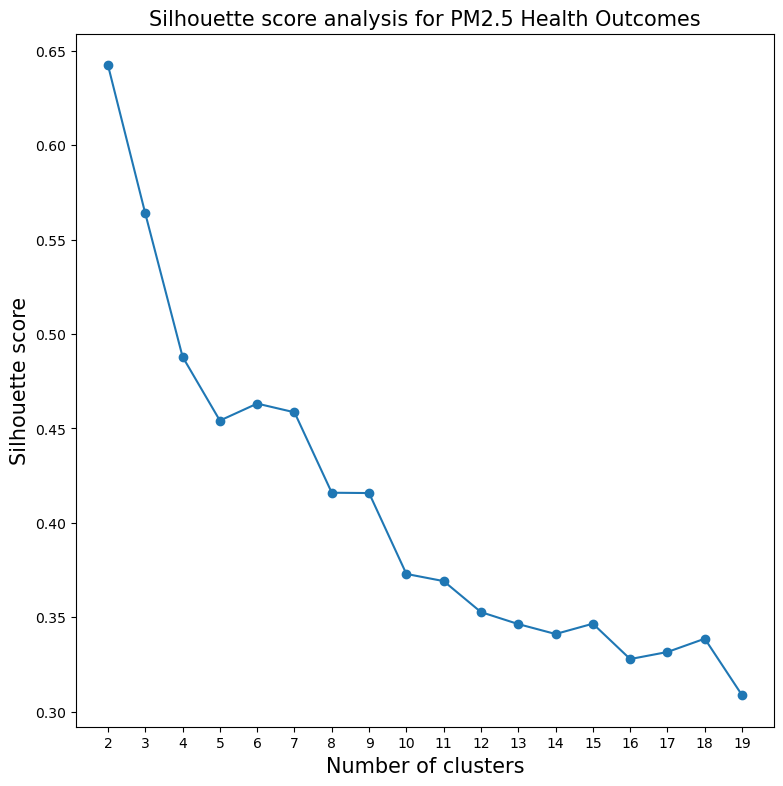

In [21]:
# searching for best nb of clusters based on Silhouette score
best_nb_cluster_pm2_5_health = tools.best_nb_cluster(
    selected_df,
    ['PM2.5 Attributable Deaths', 'PM2.5 Asthma Emergency Department Visits', 'PM2.5 Attributable Hospitalizations'],
    2,
    20,
    True,
    'Silhouette score analysis for PM2.5 Health Outcomes')

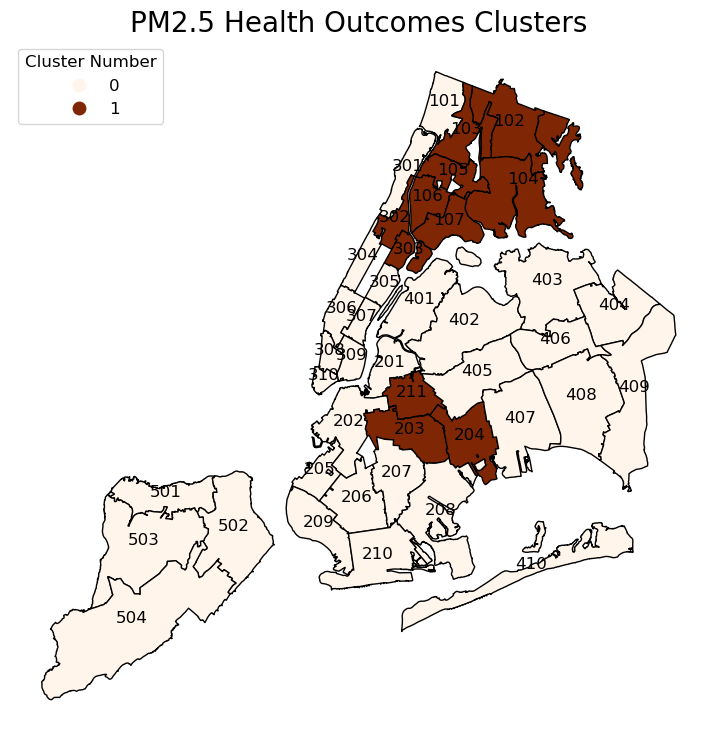

In [28]:
# clustering PM2.5 health outcomes
cluster_labels_pm2_5_health = tools.clustering(selected_df, 
                                               ['PM2.5 Attributable Deaths', 'PM2.5 Asthma Emergency Department Visits', 'PM2.5 Attributable Hospitalizations'],
                                               best_nb_cluster_pm2_5_health)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_pm2_5_health, 'PM2.5 Health Outcomes Clusters')

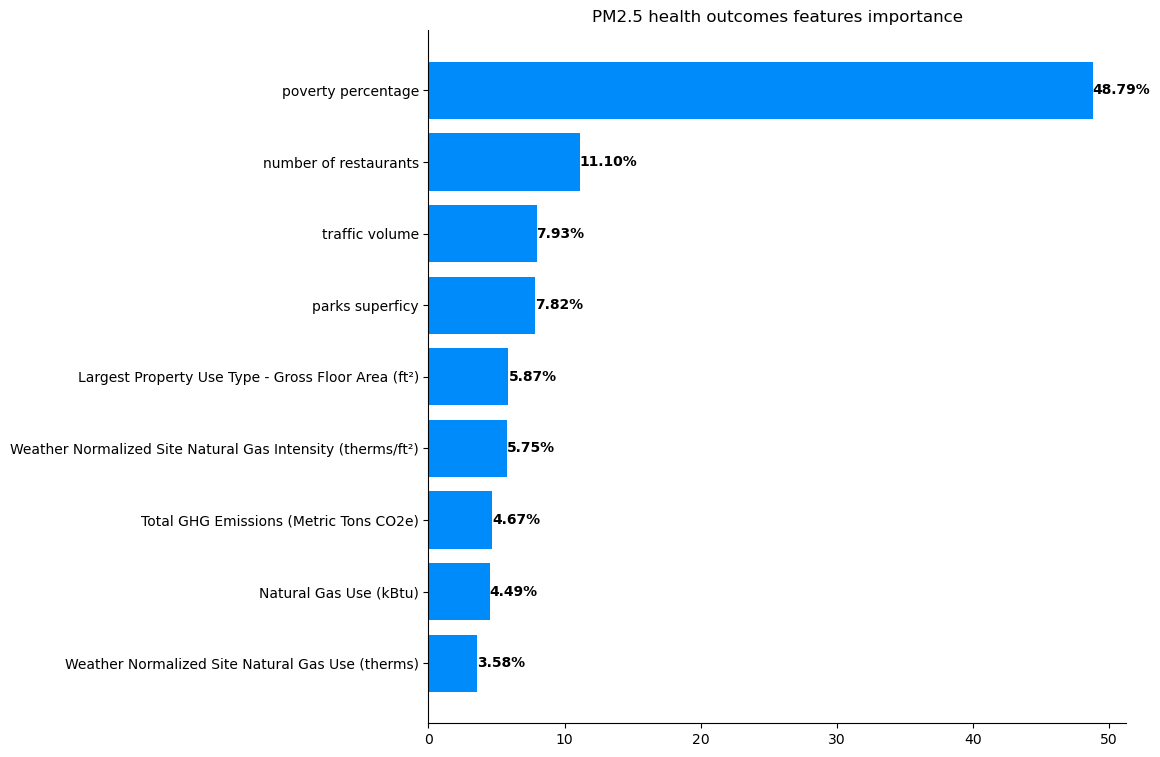

In [29]:
tools.feature_importance(
    selected_df, 
    ['Largest Property Use Type - Gross Floor Area (ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'poverty percentage', 'traffic volume'],
    cluster_labels_pm2_5_health,
    'PM2.5 health outcomes features importance'
)

## O3 health outcomes:

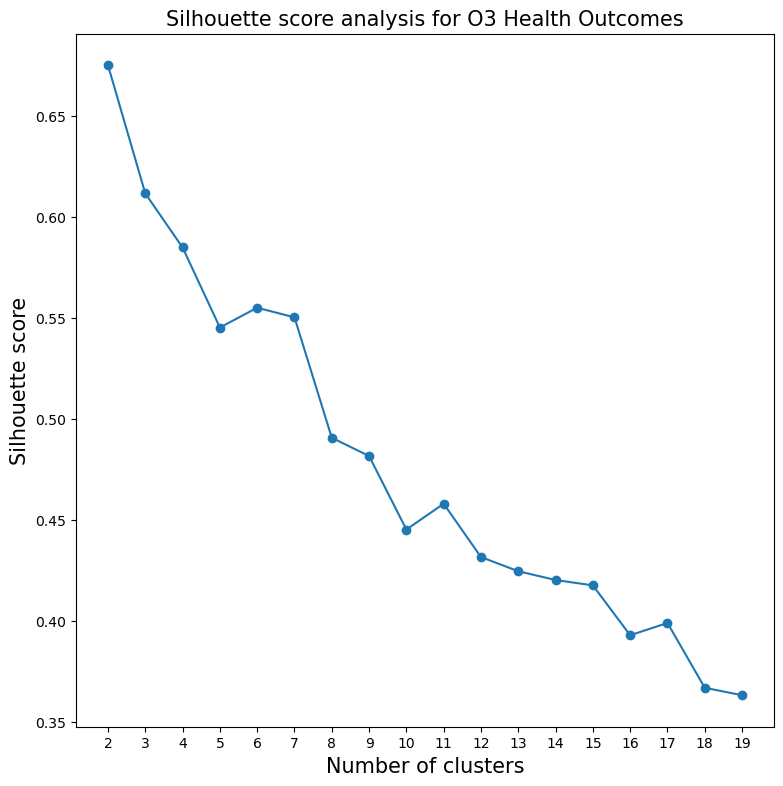

In [30]:
best_nb_cluster_o3_health = tools.best_nb_cluster(
    selected_df,
    ['O3 Attributable Deaths','O3 Particles Concentration', 'O3 Asthma Emergency Department Visits', 'O3 Attributable Hospitalizations'],
    2,
    20,
    True,
    'Silhouette score analysis for O3 Health Outcomes')

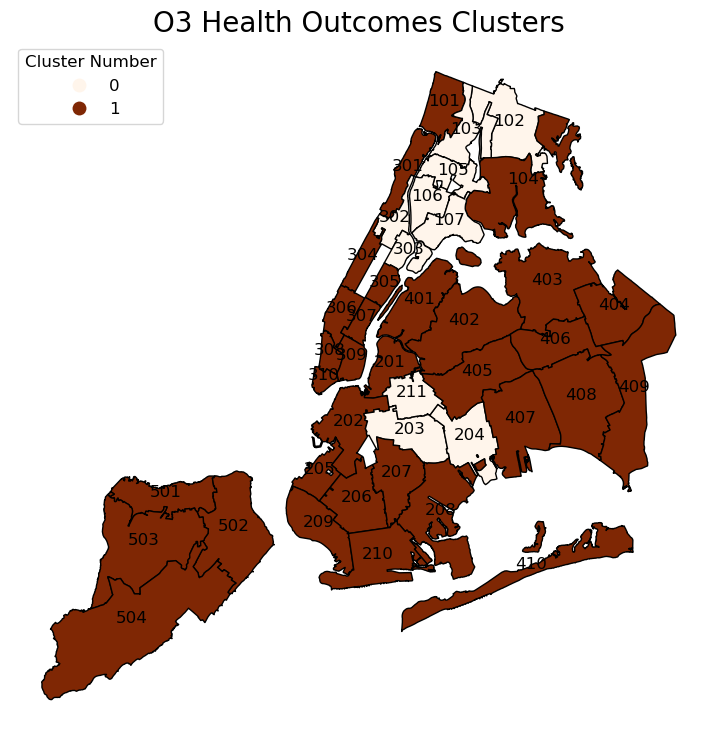

In [32]:
# clustering PM2.5 health outcomes
cluster_labels_o3_health = tools.clustering(selected_df, 
                                               ['O3 Attributable Deaths','O3 Particles Concentration', 'O3 Asthma Emergency Department Visits', 'O3 Attributable Hospitalizations'],
                                               best_nb_cluster_o3_health)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_o3_health, 'O3 Health Outcomes Clusters')

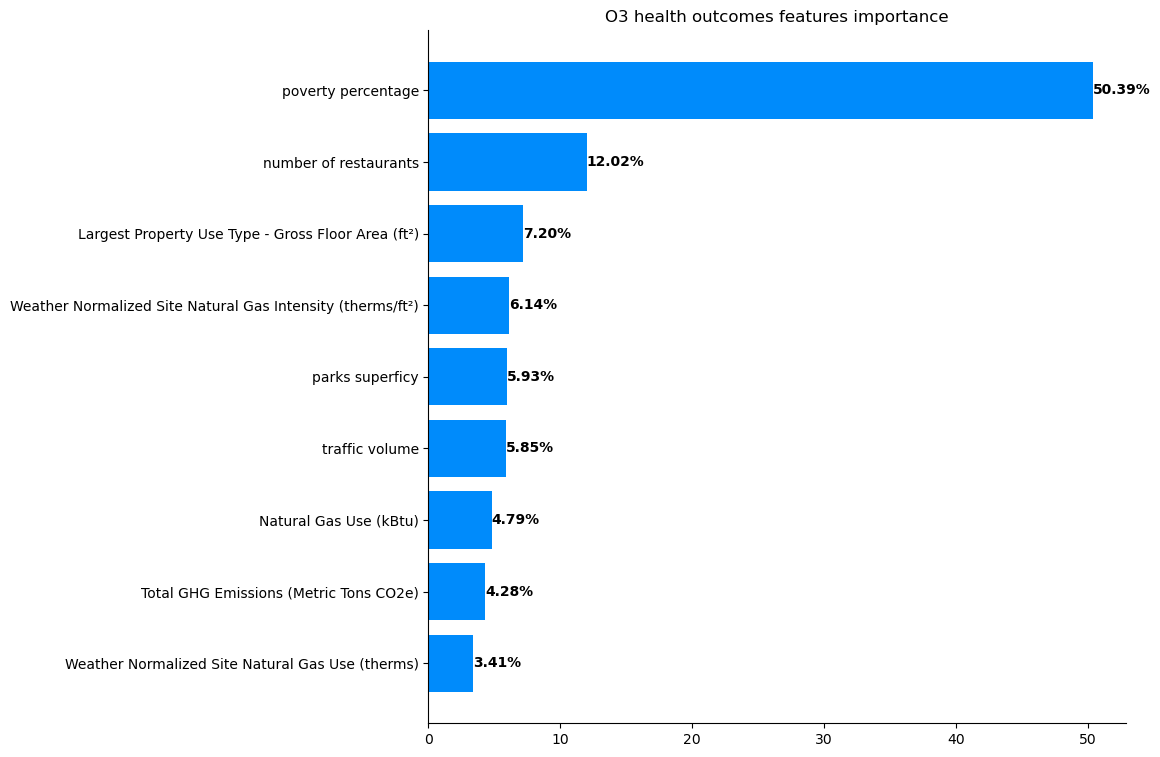

In [33]:
tools.feature_importance(
    selected_df, 
    ['Largest Property Use Type - Gross Floor Area (ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'poverty percentage', 'traffic volume'],
    cluster_labels_o3_health,
    'O3 health outcomes features importance'
)

# Concentrations clustering:

## PM2.5 Concentration:

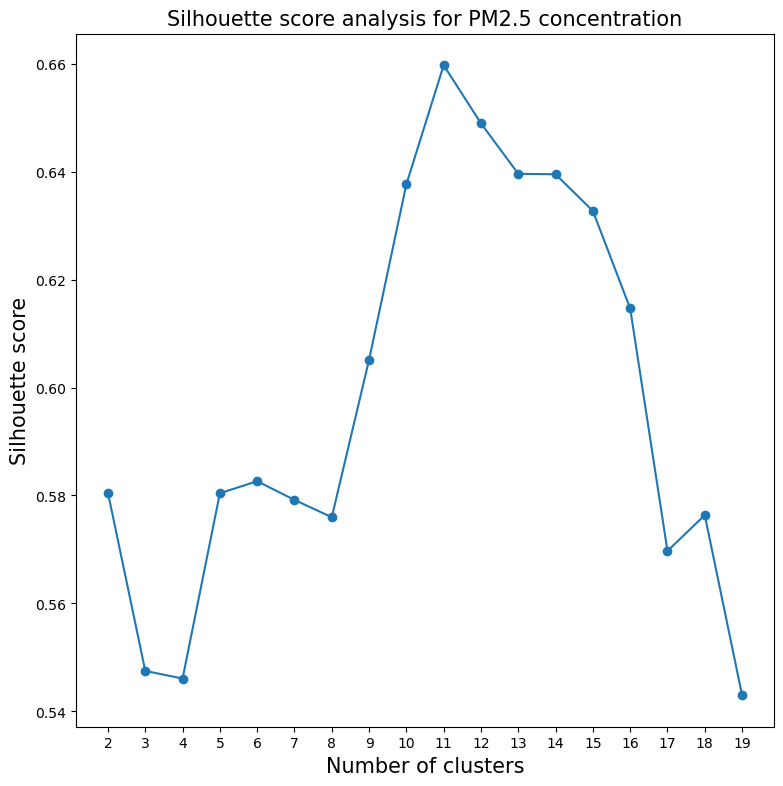

In [35]:
# searching for best nb of clusters based on Silhouette score
best_nb_cluster_pm2_5_concentration = tools.best_nb_cluster(
    selected_df,
    ['PM2.5 Particles Concentration'],
    2,
    20,
    True,
    'Silhouette score analysis for PM2.5 concentration')

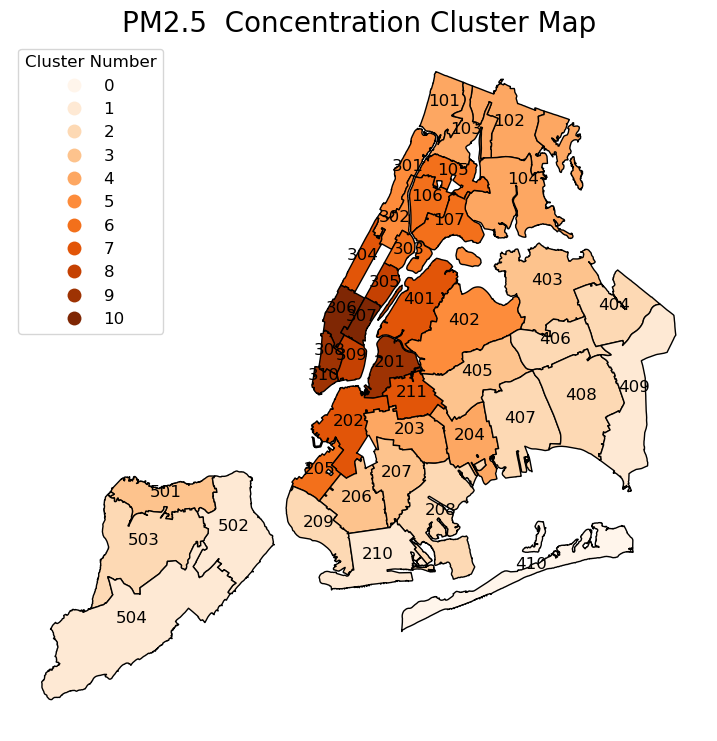

In [37]:
# clustering PM2.5 health outcomes
dic_reorder_pm2_5_concentration, cluster_labels_pm2_5_concentration = tools.clustering(selected_df, ['PM2.5 Particles Concentration'], best_nb_cluster_pm2_5_concentration, True)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_pm2_5_concentration, 
                             'PM2.5  Concentration Cluster Map',
                             dic_reorder_pm2_5_concentration)

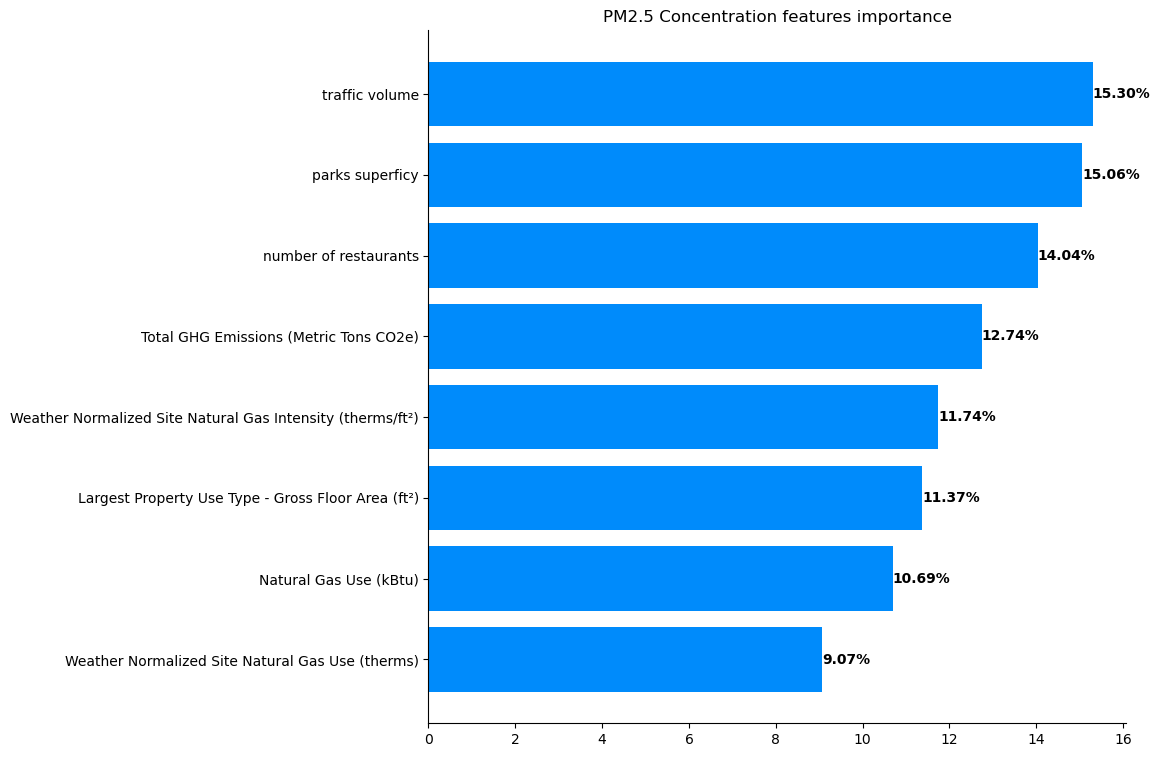

In [39]:
tools.feature_importance(
    selected_df, 
    ['Largest Property Use Type - Gross Floor Area (ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'traffic volume'],
    cluster_labels_pm2_5_concentration,
    'PM2.5 Concentration features importance'
)

## O3 Concentration:

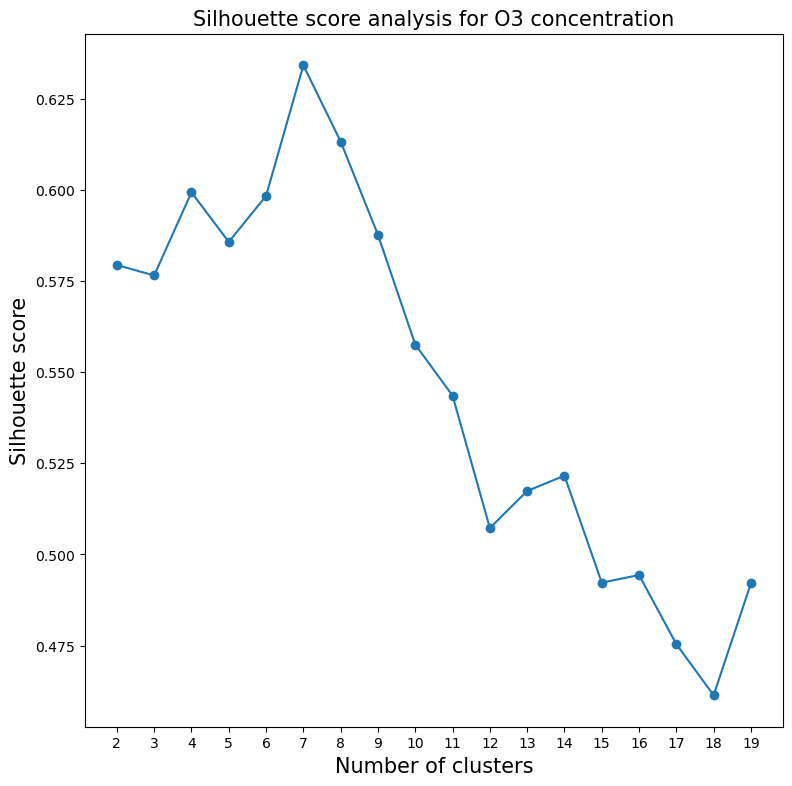

In [41]:
# searching for best nb of clusters based on Silhouette score
best_nb_cluster_o3_concentration = tools.best_nb_cluster(
    selected_df,
    ['O3 Particles Concentration'],
    2,
    20,
    True,
    'Silhouette score analysis for O3 concentration')

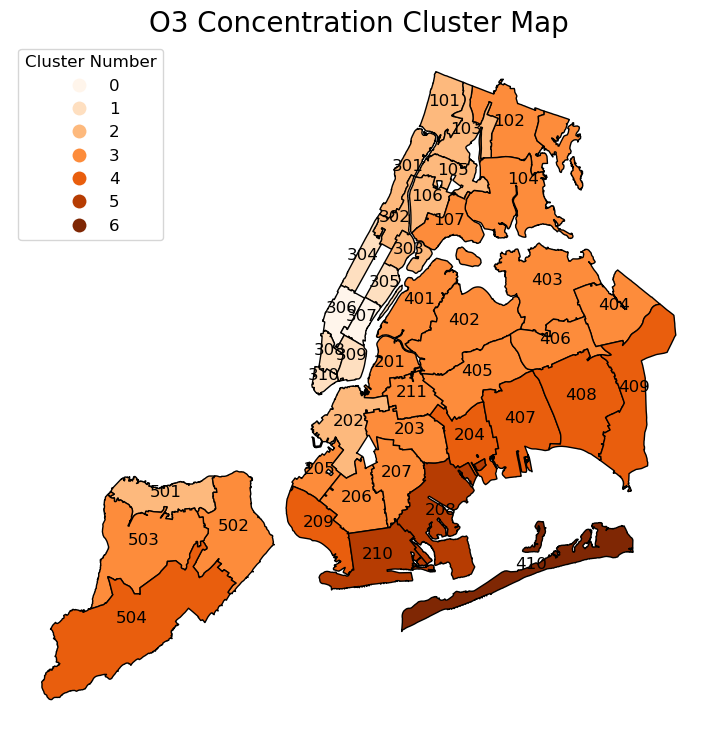

In [44]:
# clustering PM2.5 health outcomes
dic_reorder_o3_concentration, cluster_labels_o3_concentration = tools.clustering(selected_df, ['O3 Particles Concentration'], best_nb_cluster_o3_concentration, True)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_o3_concentration, 
                             'O3 Concentration Cluster Map',
                             dic_reorder_o3_concentration)

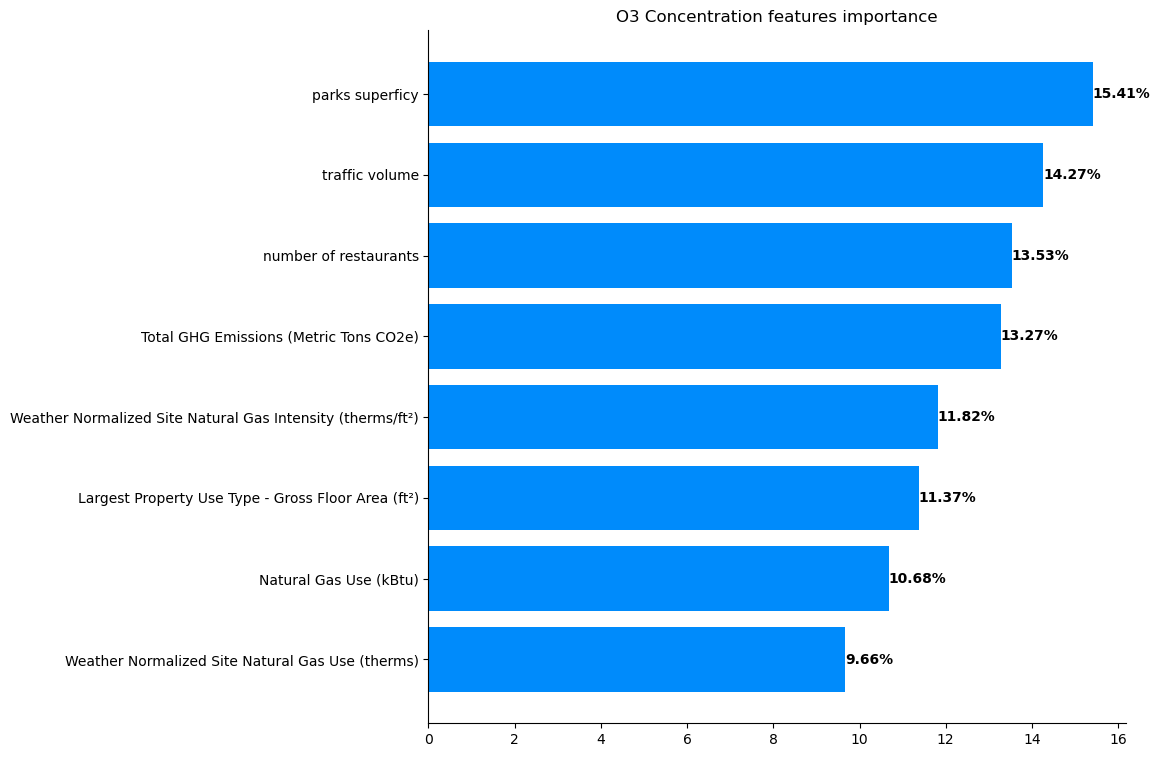

In [45]:
tools.feature_importance(
    selected_df, 
    ['Largest Property Use Type - Gross Floor Area (ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'traffic volume'],
    cluster_labels_o3_concentration,
    'O3 Concentration features importance'
)

## Correlation analysis:

In [50]:
columns = full_dataset.columns
for column in columns:
    print(column)

UHF42
Largest Property Use Type - Gross Floor Area (ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Total GHG Emissions (Metric Tons CO2e)
number of restaurants
parks superficy
poverty percentage
traffic volume
Borough
NO2 | Annual Average 2009
NO2 | Annual Average 2010
NO2 | Annual Average 2011
NO2 | Annual Average 2012
NO2 | Annual Average 2013
NO2 | Annual Average 2014
NO2 | Annual Average 2015
NO2 | Annual Average 2016
NO2 | Annual Average 2017
NO2 | Annual Average 2018
NO2 | Annual Average 2019
NO2 | Annual Average 2020
NO2 | Annual Average 2021
NO2 | Summer 2009
NO2 | Summer 2010
NO2 | Summer 2011
NO2 | Summer 2012
NO2 | Summer 2013
NO2 | Summer 2014
NO2 | Summer 2015
NO2 | Summer 2016
NO2 | Summer 2017
NO2 | Summer 2018
NO2 | Summer 2019
NO2 | Summer 2020
NO2 | Summer 2021
NO2 | Winter 2008-09
NO2 | Winter 2009-10
NO2 | Winter 2010-11
NO2 | Winter 2011-12
NO2 | Winter 2012-13
NO2 | Winter 201

In [49]:
corr = selected_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Factors and OAPs Concentration', fontsize=15)
plt.show()

ValueError: could not convert string to float: 'Bronx'